In [7]:
from nutils import*
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors, collections, cm
import vtk
import image_based_analysis as im

In [12]:
def mysample(topo, ischeme, degree):
    'Create sample.'

    references = [topo.references[i] for i in range(10)]
    points = PointsSequence.from_iter((ischeme(reference, degree) for reference in references), topo.ndims) if callable(ischeme) \
        else topo.references.getpoints(ischeme, degree)
    transforms = topo.transforms,
    if len(topo.transforms) == 0 or topo.opposites != topo.transforms:
        transforms += topo.opposites,
    return sample.Sample.new(transforms, points)

In [13]:
ptA = [0,0,0]
ptB = [1,1,1]
shape = [10,10]
topo, geom = im.BuildGridMesh(ptA, ptB, shape)

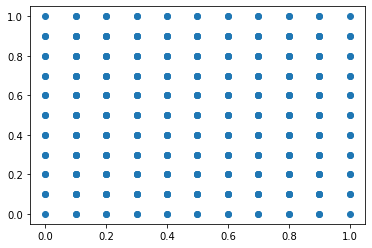

In [14]:
bez = mysample(topo, 'bezier', 2)
vals = bez.eval(geom)
plt.plot(vals[:,0], vals[:,1],'o')